<a href="https://colab.research.google.com/github/SahanaTP/Pesticide_Exposure_Detection/blob/main/model/decision_tree_p_significant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import dimension_reduction
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
from tabulate import tabulate
import eval_metrics
import graphviz
from sklearn import tree
import pydotplus
from sklearn import metrics
import learning_curve
import cross_validation
import pickle

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,SEQN,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Health_cond,Diabetes,Difficulty Hearing,Difficulty Seeing,Drug Addict,Hepatitis_B,Hepatitis_C,hospitalized,days_hospitalised,Weak Kidney,Dialysis,Kidney Stone,Pesticide_used,asthma,asthma_current,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,current_chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,glyphosate,UACR
0,83736,2,42,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,83739,1,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,83745,2,15,0,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,83746,2,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,83748,1,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [5]:
data.drop('SEQN', axis=1, inplace=True)

In [6]:
def show_value_counts(data):
    for column in data.columns:
        unique_values = data[column].nunique()
        if unique_values > 3:
            print(f"Column: {column}")
            print(data[column].value_counts())
            print("\n")

In [7]:
show_value_counts(data)

Column: Age
80    552
4     243
5     211
3     196
63    142
     ... 
33     34
24     30
30     30
25     27
21     23
Name: Age, Length: 78, dtype: int64


Column: Health_cond
3.0    1848
4.0    1336
2.0     914
1.0     310
5.0     278
Name: Health_cond, dtype: int64


Column: days_hospitalised
0.0    5254
1.0     611
2.0     233
3.0      84
6.0      23
5.0      15
4.0       1
Name: days_hospitalised, dtype: int64




In [8]:
def get_missing_val_count_df(df):
    missing_values = df.isnull().sum()
    missing_df = pd.DataFrame({'Feature_with_missing_value': missing_values.index, 'Missing_values': missing_values.values})
    return missing_df[missing_df['Missing_values'] > 0]

In [9]:
msdf = get_missing_val_count_df(data)
msdf

,Feature_with_missing_value,Missing_values
4,current_drinker,1568
5,former_drinker_x,1568
6,current_smoker,1177
7,former_drinker_y,1177
8,Aspirin_use,2448
9,High_Blood_pressure,1426
10,High_Cholestrol,1426
11,Chest_pain,2448
16,Health_cond,1535
20,Drug Addict,2903


In [10]:
missing_column_names = msdf['Feature_with_missing_value'].tolist()

In [11]:
data.shape

(6221, 74)

In [12]:
y = data['UACR']
X = data.drop(columns=['UACR'])

In [13]:
X.shape, y.shape

((6221, 73), (6221,))

In [14]:
# Lets impute missing values using knn Imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
X = imputer.transform(X)
X.shape

(6221, 73)

In [15]:
X_columns = data.iloc[:, :-1]  # Select all columns except the last one
X = pd.DataFrame(X, columns=X_columns.columns)

In [16]:
X.shape

(6221, 73)

In [17]:
def process_columns(df, column_names):
    for column_name in column_names:
        for i in range(df.shape[0]):
            if df.loc[i, column_name] < 0.5:
                df.loc[i, column_name] = 0
            else:
                df.loc[i, column_name] = 1

In [18]:
process_columns(X, missing_column_names)

In [19]:
X.isna().sum().sum()# no missing values

0

In [20]:
X_significant = dimension_reduction.get_p_values_significant_features(X,y)

**************************************************
significant features
**************************************************
                         Feature_name       p-Value
0                            Diabetes  7.360261e-41
1                         Weak Kidney  3.013802e-35
2                        heart attack  2.278719e-26
3                        Kidney Stone  2.141439e-13
4                      asthma_current  4.007719e-11
5            congestive heart failure  5.113663e-11
6                           emphysema  1.638396e-10
7                    former_drinker_x  3.019788e-10
8                                gout  7.298402e-07
9                     current_drinker  1.803175e-05
10                     Marital_status  5.005813e-05
11                         Chest Cold  5.816906e-05
12                          arthritis  1.317135e-04
13                             stroke  1.590092e-04
14    4-fluoro-3-phenoxy-benzoic acid  1.869204e-04
15                                Age  6.5522

In [21]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_significant, y, test_size=0.2, random_state=2)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [23]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (3980, 33) (3980,)
validation data(X_valid,y_valid) shape:  (996, 33) (996,)
test data(X_test,y_test) shape:  (1245, 33) (1245,)


# **Decision tree baseline model**

Using a fully grown decision tree - It will overfit the data

In [24]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_DT_baseline = model.predict(X_valid)

In [25]:
print('Fully grown tree depth: ',model.get_depth())
print('Fully grown tree number of leaf: ',model.get_n_leaves())

Fully grown tree depth:  22
Fully grown tree number of leaf:  532


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       827
           1       0.77      0.79      0.78       169

    accuracy                           0.92       996
   macro avg       0.86      0.87      0.87       996
weighted avg       0.92      0.92      0.92       996

Confusion Matrix:
 [[786  41]
 [ 35 134]]


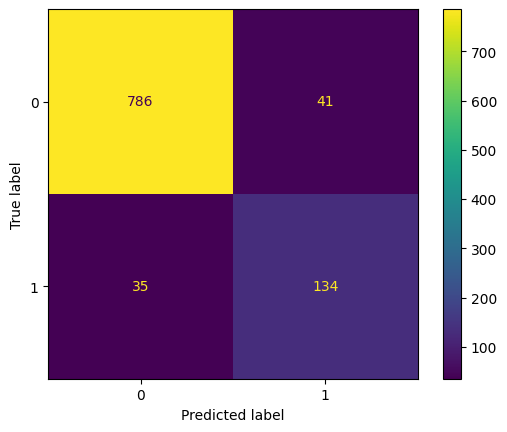

Accuracy: 0.9236947791164659
Precision: 0.7657142857142857
Recall: 0.7928994082840237
Sensitivity: 0.7928994082840237
Specificity: 0.9504232164449818
F1-Score: 0.7790697674418605
Cohen Kappa Score: 0.7329702194910291
G_measure: 0.7790697674418605
Informedness/Youdens statistic: 0.7433226247290055
PPV: 0.7657142857142857
NPV: 0.9573690621193667
Markedness: 0.7230833478336525
Matthews Correlation Coefficient 0.7331331475315701
ROC-AUC Score: 0.8716613123645028


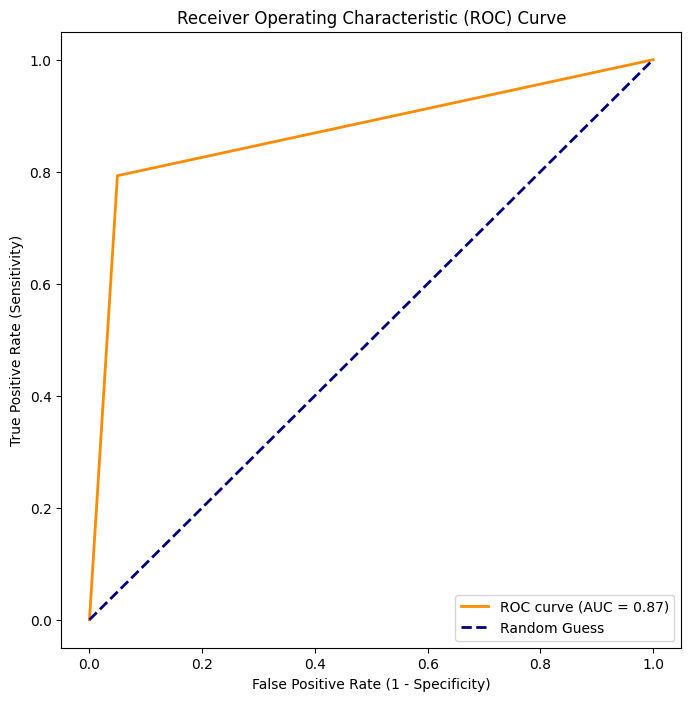

In [26]:
eval_metrics.metrics_calculation(y_valid, y_pred_DT_baseline, True)

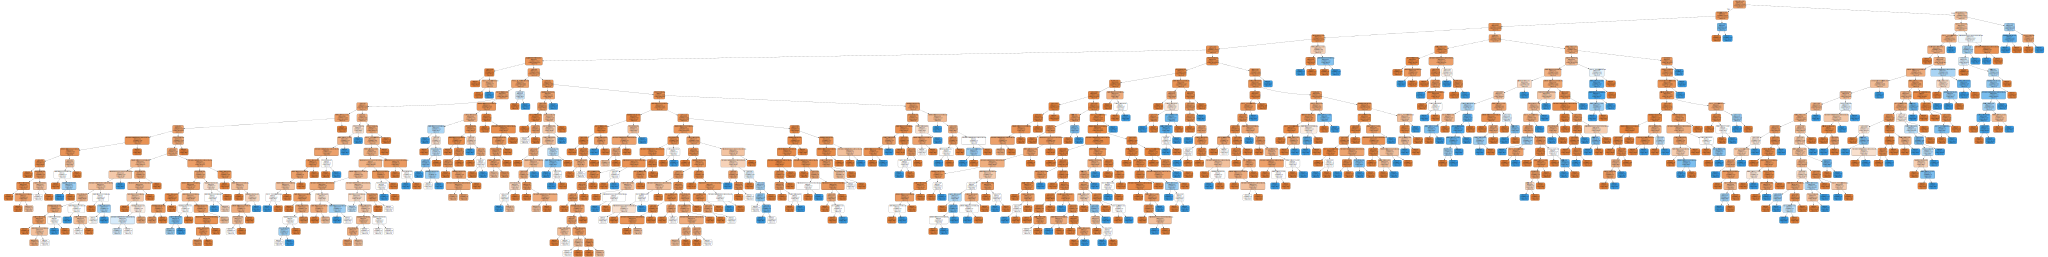

In [27]:
import graphviz
from sklearn import tree
import pydotplus

tree_data = tree.export_graphviz(model, out_file=None,
                                 feature_names=X_train.columns,class_names=['0','1'],
                                 filled=True, rounded=True,
                                 impurity=True, special_characters=True)
graph_tree = graphviz.Source(tree_data)
graph = pydotplus.graph_from_dot_data(tree_data)
graph.write_png('tree.png')
graph_tree

# Hyperparameter tuning

In [28]:
# defining a grid search like function for decision tree to get hyper parameters
def dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_test, y_train, y_test):
  for k in range(0,len(criterions_array)):
    for i in range(0, len(max_depth_array)):
      for j in range(0,len(min_s_leaf_array)):
        max_depth_val = max_depth_array[i]
        min_s_leaf_val = min_s_leaf_array[j]
        criterion_val = criterions_array[k]
        d_tree_clf = DecisionTreeClassifier(max_depth=max_depth_val, min_samples_leaf=min_s_leaf_val, criterion=criterion_val, random_state=2023)#####
        d_tree_clf = d_tree_clf.fit(X_train,y_train)
        y_pred = d_tree_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        parameters_dict = {'criterion':criterion_val, 'max_depth':max_depth_val, 'min_samples_leaf': min_s_leaf_val, 'accuracy': accuracy, 'F1_score':F1_score, 'precision':precision, 'recall':recall}
        params.append(parameters_dict)
        print(f'criterion:{criterion_val}, max_depth:{max_depth_val}, min_samples_leaf:{min_s_leaf_val}, accuracy:{accuracy}, F1_score:{F1_score}')

In [29]:
# lets set the hyperparameters
max_depth_array = [2,4,6,8,10]
min_s_leaf_array = [5,10,15]
criterions_array = ['gini','entropy']
params = list()

dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_valid, y_train, y_valid)

criterion:gini, max_depth:2, min_samples_leaf:5, accuracy:0.8493975903614458, F1_score:0.5831473214285714
criterion:gini, max_depth:2, min_samples_leaf:10, accuracy:0.8493975903614458, F1_score:0.5831473214285714
criterion:gini, max_depth:2, min_samples_leaf:15, accuracy:0.8493975903614458, F1_score:0.5831473214285714
criterion:gini, max_depth:4, min_samples_leaf:5, accuracy:0.8604417670682731, F1_score:0.6405685727266828
criterion:gini, max_depth:4, min_samples_leaf:10, accuracy:0.856425702811245, F1_score:0.6302252223015513
criterion:gini, max_depth:4, min_samples_leaf:15, accuracy:0.857429718875502, F1_score:0.6313188188188188
criterion:gini, max_depth:6, min_samples_leaf:5, accuracy:0.8624497991967871, F1_score:0.6695237287930345
criterion:gini, max_depth:6, min_samples_leaf:10, accuracy:0.8554216867469879, F1_score:0.6460938656664857
criterion:gini, max_depth:6, min_samples_leaf:15, accuracy:0.8594377510040161, F1_score:0.6394402325124375
criterion:gini, max_depth:8, min_samples_l

In [52]:
# lets sort the metrics in descending order
param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
df = pd.DataFrame.from_dict(param_sorted)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

# optimal set of hyperparameters will be the top value in the sorted parameter list
opt_hparams = param_sorted[0]
print('**'*60)
print(f'\noptimal hyper-parameters: {opt_hparams}\n')
print('**'*60)

+----+-------------+-------------+--------------------+------------+------------+-------------+----------+
|    | criterion   |   max_depth |   min_samples_leaf |   accuracy |   F1_score |   precision |   recall |
|----+-------------+-------------+--------------------+------------+------------+-------------+----------|
|  0 | gini        |          10 |                 10 |   0.891566 |   0.771488 |    0.846978 | 0.732261 |
|  1 | gini        |          10 |                  5 |   0.890562 |   0.767225 |    0.847842 | 0.726948 |
|  2 | entropy     |          10 |                  5 |   0.888554 |   0.761469 |    0.844777 | 0.721031 |
|  3 | gini        |           8 |                  5 |   0.885542 |   0.746198 |    0.851021 | 0.70274  |
|  4 | entropy     |          10 |                 10 |   0.884538 |   0.744813 |    0.846468 | 0.702135 |
|  5 | gini        |          10 |                 15 |   0.883534 |   0.738282 |    0.850998 | 0.694468 |
|  6 | gini        |           8 |   

# Cross validation

In [30]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation
model_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, criterion='gini', random_state=2023)
model_tuned.fit(X_train_full, y_train_full)
cross_validation.cross_validation_func(model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.8902232084814932,
 'Mean Train Precision': 0.8398691964077768,
 'Mean Train Recall': 0.4746105360458352,
 'Mean Train F1 Score': 0.6051602395100693,
 'Mean Valid Accuracy': 87.07785917539506,
 'Mean Valid Precision': 0.7571786634934786,
 'Mean Valid Recall': 0.4051482257347807,
 'Mean Valid F1 Score': 0.526648576535684}

# Testing Decision Tree with optimal hyperparameters on unseen data

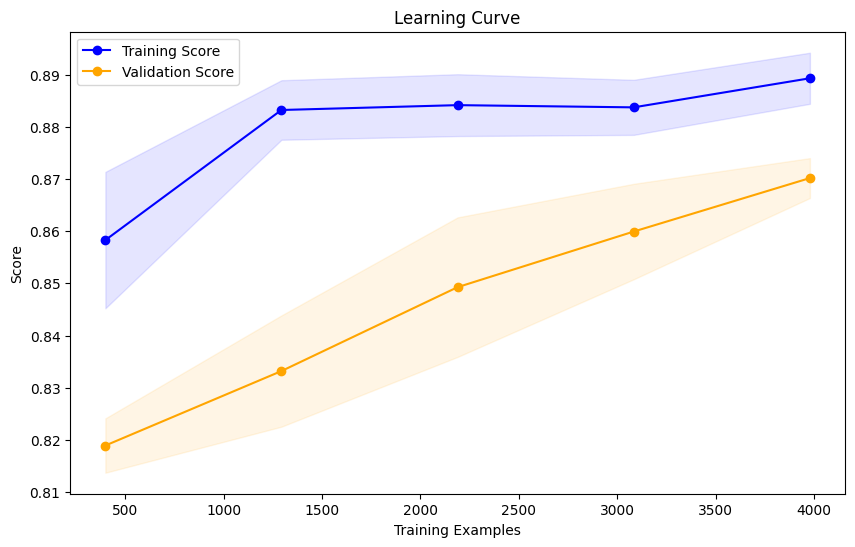

In [31]:
model_opt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, criterion='gini', random_state=2023)
model_opt.fit(X_train_full, y_train_full)
y_pred_DT_opt = model.predict(X_test)
learning_curve.plot_learning_curve(model_opt, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1020
           1       0.81      0.76      0.79       225

    accuracy                           0.93      1245
   macro avg       0.88      0.86      0.87      1245
weighted avg       0.92      0.93      0.92      1245

Confusion Matrix:
 [[980  40]
 [ 53 172]]


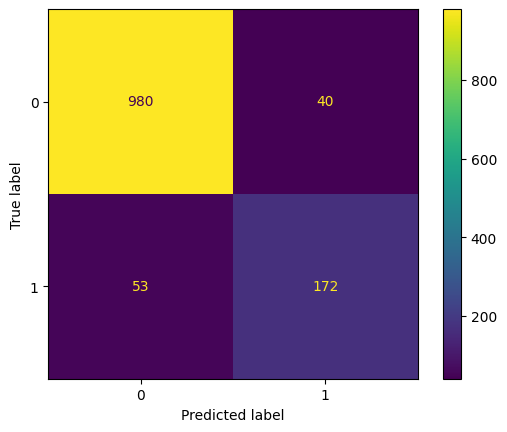

Accuracy: 0.9253012048192771
Precision: 0.8113207547169812
Recall: 0.7644444444444445
Sensitivity: 0.7644444444444445
Specificity: 0.9607843137254902
F1-Score: 0.7871853546910755
Cohen Kappa Score: 0.7419344054026946
G_measure: 0.7871853546910755
Informedness/Youdens statistic: 0.7252287581699348
PPV: 0.8113207547169812
NPV: 0.9486931268151017
Markedness: 0.7600138815320827
Matthews Correlation Coefficient 0.7424176206795096
ROC-AUC Score: 0.8626143790849673


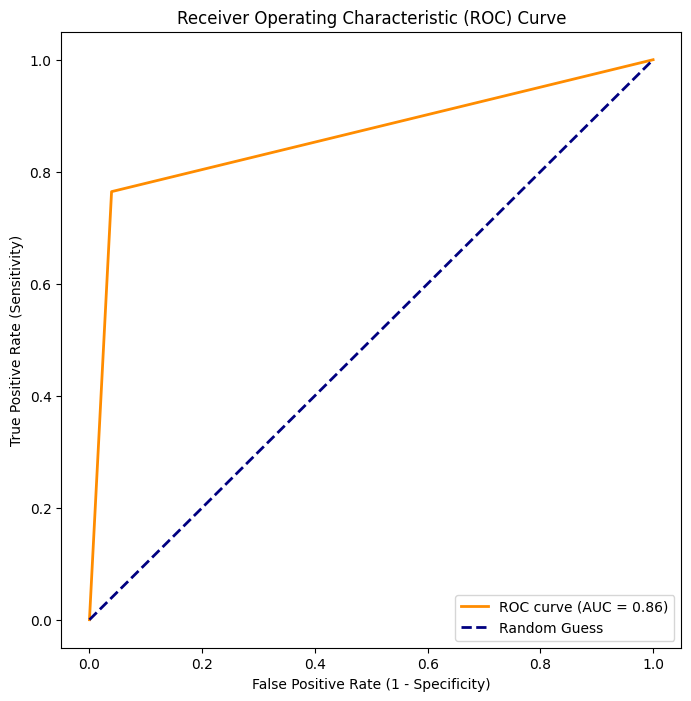

In [32]:
eval_metrics.metrics_calculation(y_test, y_pred_DT_opt, True)

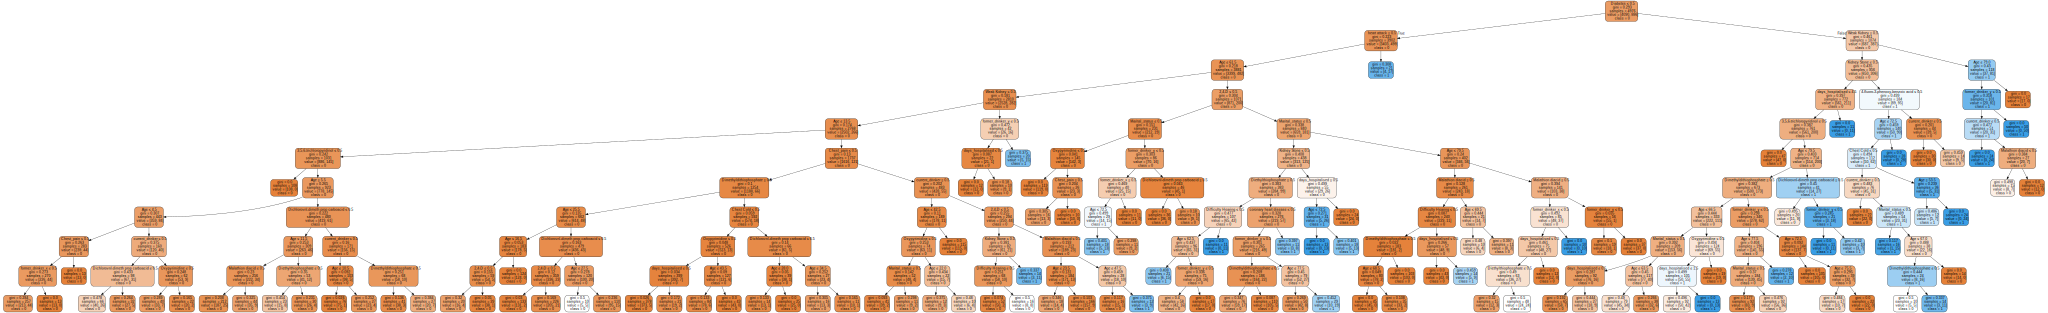

In [33]:
opt_tree_data = tree.export_graphviz(model_opt, out_file=None,
                                 feature_names=X_train.columns,class_names=['0','1'],
                                 filled=True, rounded=True,
                                 impurity=True, special_characters=True)
opt_graph_tree = graphviz.Source(opt_tree_data)
opt_graph = pydotplus.graph_from_dot_data(opt_tree_data)
opt_graph.write_png('tree_opt.png')
opt_graph_tree

In [35]:
filename = 'dt_opt_p_signi_model_.sav'
pickle.dump(model, open(filename, 'wb'))

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1020
           1       0.81      0.76      0.79       225

    accuracy                           0.93      1245
   macro avg       0.88      0.86      0.87      1245
weighted avg       0.92      0.93      0.92      1245

Confusion Matrix:
 [[980  40]
 [ 53 172]]


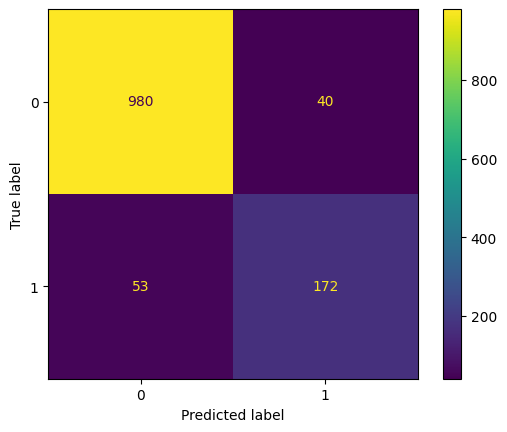

Accuracy: 0.9253012048192771
Precision: 0.8113207547169812
Recall: 0.7644444444444445
Sensitivity: 0.7644444444444445
Specificity: 0.9607843137254902
F1-Score: 0.7871853546910755
Cohen Kappa Score: 0.7419344054026946
G_measure: 0.7871853546910755
Informedness/Youdens statistic: 0.7252287581699348
PPV: 0.8113207547169812
NPV: 0.9486931268151017
Markedness: 0.7600138815320827
Matthews Correlation Coefficient 0.7424176206795096
ROC-AUC Score: 0.8626143790849673


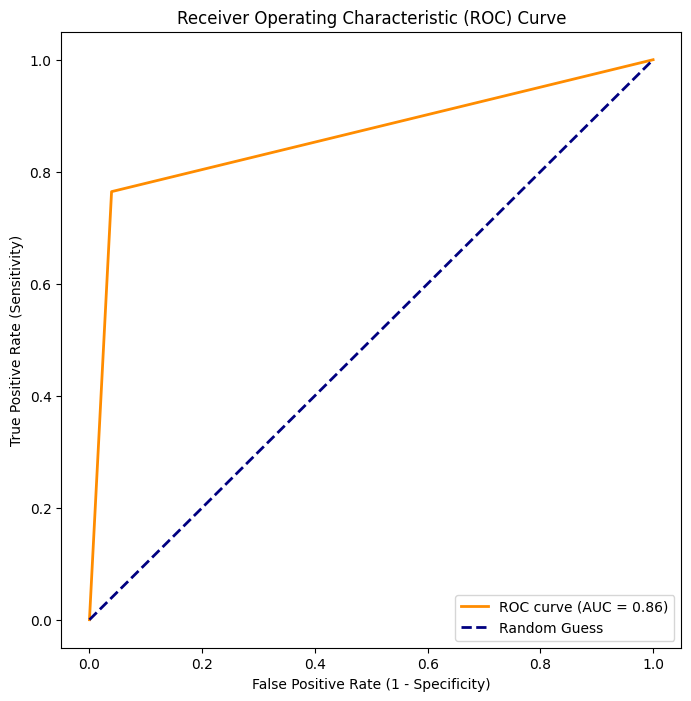

In [36]:
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)
eval_metrics.metrics_calculation(y_test, y_pred, True)